In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.optimize import curve_fit

%matplotlib inline

Для начала напишем реализацию поразрядной сортировки `Radix`:

In [88]:
def radix(arr):
    max_deg = max(len(str(x)) for x in arr) 
    #число разрядов в наибольшем числе
    bins = [[] for _ in range(10)]

    for i in range(0, max_deg):
        # перебираем все элементы в массиве
        for x in arr:
            # получаем цифру текущего разряда для каждого числа массива
            digit = (x // 10 ** i) % 10
            # отправляем число в промежуточный массив в ячейку, которая совпадает со значением этой цифры 
            bins[digit].append(x)
        # собираем в исходный массив все ненулевые значения из промежуточного массива
        arr = [x for queue in bins for x in queue]

        # очищаем промежуточный массив
        bins = [[] for _ in range(10)]

    # возвращаем отсортированный массив
    return arr

Соберём данные о времени работы сортировок массивов чисел $x_i \in [0;10^8]$ в зависимости от размеров $N \in [10;10^6]$ массивов

In [51]:
sizes_radix=np.array([])
times_radix=[]

for size_ in np.linspace(10, 10**6, 40).astype(int):
    #размер массива
    sizes_radix=np.append(sizes_radix, size_)
    ar=np.random.randint(0, 10**8, size_)
    start_time = time.time()
    a=radix(ar)
    times_radix.append(time.time()-start_time)

In [52]:
sizes_radix /= 10**3

sizes_radix

array([1.00000e-02, 2.56500e+01, 5.12910e+01, 7.69320e+01, 1.02573e+02,
       1.28213e+02, 1.53854e+02, 1.79495e+02, 2.05136e+02, 2.30776e+02,
       2.56417e+02, 2.82058e+02, 3.07699e+02, 3.33340e+02, 3.58980e+02,
       3.84621e+02, 4.10262e+02, 4.35903e+02, 4.61543e+02, 4.87184e+02,
       5.12825e+02, 5.38466e+02, 5.64106e+02, 5.89747e+02, 6.15388e+02,
       6.41029e+02, 6.66670e+02, 6.92310e+02, 7.17951e+02, 7.43592e+02,
       7.69233e+02, 7.94873e+02, 8.20514e+02, 8.46155e+02, 8.71796e+02,
       8.97436e+02, 9.23077e+02, 9.48718e+02, 9.74359e+02, 1.00000e+03])

y= 0.00902x +-0.08924


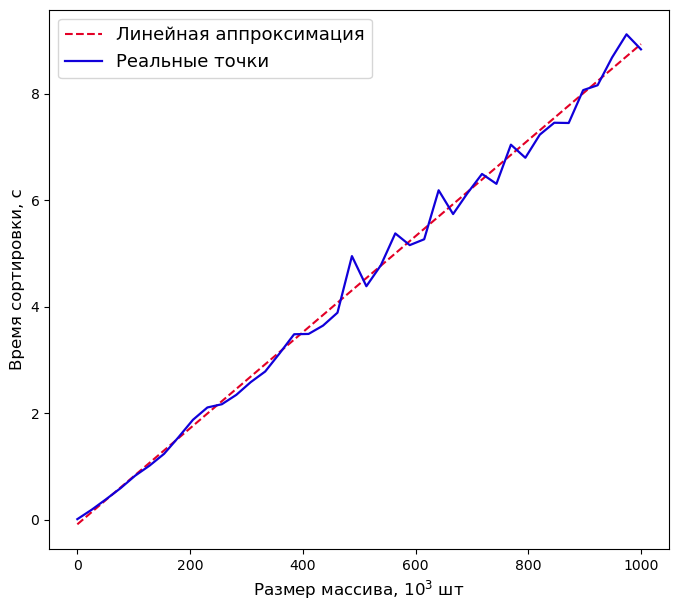

In [54]:
plt.figure(figsize=(8,7))

def func(x, a, b):
    return a*x+b

popt, pcov = curve_fit(func, sizes_radix, times_radix)

plt.plot(sizes_radix, func(sizes_radix, *popt), color='#E30026', linestyle='--', label='Линейная аппроксимация')

plt.plot(sizes_radix, times_radix, color='#1100DA', lw=1.6, label='Реальные точки')

plt.xlabel(r"Размер массива, $10^3$ шт", fontsize=12)

plt.ylabel(r"Время сортировки, c", fontsize=12)

plt.legend(fontsize=13, loc='upper left')

print('y= '+str(round(popt[0],5))+'x +'+ str(round(popt[1],5)))

**Итог:** Данная сортировка очень быстрая по сравнению с остальными, а также имеет асимптотику $O(n)$, что очень круто, однако она использует дополнительную память

Проведём аналогичные измерения для медленной сортировки `Bubble_Sort` и сравним результаты:

In [55]:
def bubble_sort(arr: list) -> None:
    n = len(arr)
    for i in range(1, n):
        for j in range(n-1):
            if arr[i] < arr[j]:
                arr[i], arr[j] = arr[j], arr[i]

In [62]:
arrr=[1,4,5,2,3,7,1,1,4]
bubble_sort(arrr)
arrr

[1, 1, 1, 2, 3, 4, 4, 5, 7]

In [69]:
sizes_bubble=np.array([])
times_bubble=[]

for size_ in np.linspace(10, 10**3.4, 40).astype(int):
    #размер массива
    sizes_bubble=np.append(sizes_bubble, size_)
    ar=np.random.randint(0, 10**8, size_)
    start_time = time.time()
    a=bubble_sort(ar)
    times_bubble.append(time.time()-start_time)

y= 3.5e-07x^2 +1.094e-05x0.007307


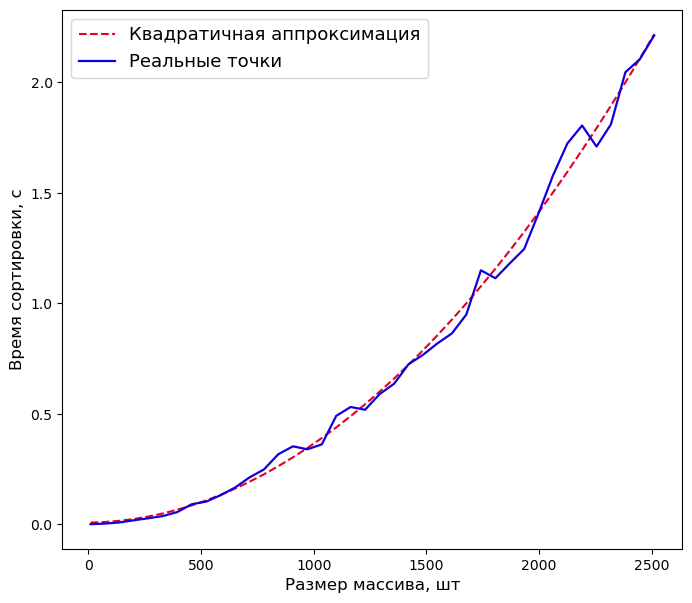

In [70]:
plt.figure(figsize=(8,7))

def func(x, a, b, c):
    return a*x**2+b*x+c

popt, pcov = curve_fit(func, sizes_bubble, times_bubble)

plt.plot(sizes_bubble, func(sizes_bubble, *popt), color='#E30026', linestyle='--', label='Квадратичная аппроксимация')

plt.plot(sizes_bubble, times_bubble, color='#1100DA', lw=1.6, label='Реальные точки')

plt.xlabel(r"Размер массива, шт", fontsize=12)

plt.ylabel(r"Время сортировки, c", fontsize=12)

plt.legend(fontsize=13, loc='upper left')

print('y= '+str(round(popt[0],8))+'x^2 +'+ str(round(popt[1],8))+'x'+str(round(popt[2],6)))

**Итог:** Данная сортировка является медленной и имеет асимптотику $O(n^2)$, что не очень круто, зато она не использует дополнительную память

**Быстрая сортировка (Пирамидальная)**

In [71]:
def heapify(arr: list, n: int, i: int) -> None:
    largest = i
    l = 2 * i + 1  # левый лист
    r = 2 * i + 2  # правый лист

    if l < n and arr[i] < arr[l]:
        largest = l

    if r < n and arr[largest] < arr[r]:
        largest = r
 
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr: list) -> None:
    n = len(arr)
    for i in range(n // 2, -1, -1):
        heapify(arr, n, i)
    
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

Проведём аналогичные измерения для `Heap-сортировки`:

In [73]:
arrr=[1,4,5,2,3,7,1,1,4]
heap_sort(arrr)
arrr

[1, 1, 1, 2, 3, 4, 4, 5, 7]

In [80]:
sizes_heap=np.array([])
times_heap=[]

for size_ in np.linspace(10, 10**5, 40).astype(int):
    #размер массива
    sizes_heap=np.append(sizes_heap, size_)
    ar=np.random.randint(0, 10**8, size_)
    start_time = time.time()
    a=heap_sort(ar)
    times_heap.append(time.time()-start_time)

In [82]:
sizes_heap /=10**3

y= 0.02019x +-0.05728


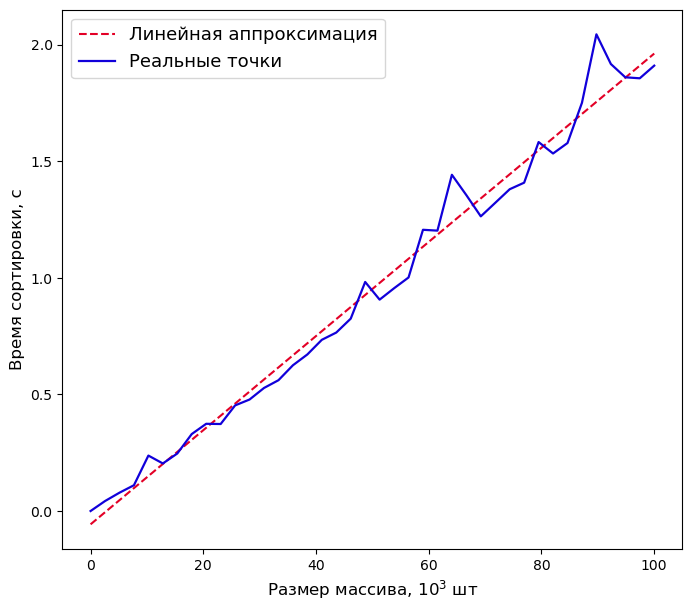

In [83]:
plt.figure(figsize=(8,7))

def func(x, a, b):
    return a*x+b

popt, pcov = curve_fit(func, sizes_heap, times_heap)

plt.plot(sizes_heap, func(sizes_heap, *popt), color='#E30026', linestyle='--', label='Линейная аппроксимация')

plt.plot(sizes_heap, times_heap, color='#1100DA', lw=1.6, label='Реальные точки')

plt.xlabel(r"Размер массива, $10^3$ шт", fontsize=12)

plt.ylabel(r"Время сортировки, c", fontsize=12)

plt.legend(fontsize=13, loc='upper left')

print('y= '+str(round(popt[0],5))+'x +'+ str(round(popt[1],5)))

**Итог:** Данная сортировка имеет асимптотику $O(n)$ и является быстрой, что очень круто, однако она использует дополнительную память и при этом медленнее чем `Radix`

**Сравним сразу 3 сортировки:**

In [84]:
sizes_radix=np.array([])
times_radix=[]
sizes_bubble=np.array([])
times_bubble=[]
sizes_heap=np.array([])
times_heap=[]

for size_ in np.linspace(10, 10**3.5, 40).astype(int):
    #размер массива
    sizes_radix=np.append(sizes_radix, size_)
    ar=np.random.randint(0, 10**8, size_)
    start_time = time.time()
    a=radix(ar)
    times_radix.append(time.time()-start_time)
    
    sizes_bubble=np.append(sizes_bubble, size_)
    start_time = time.time()
    bubble_sort(ar)
    times_bubble.append(time.time()-start_time)
    
    sizes_heap=np.append(sizes_heap, size_)
    start_time = time.time()
    heap_sort(ar)
    times_heap.append(time.time()-start_time)

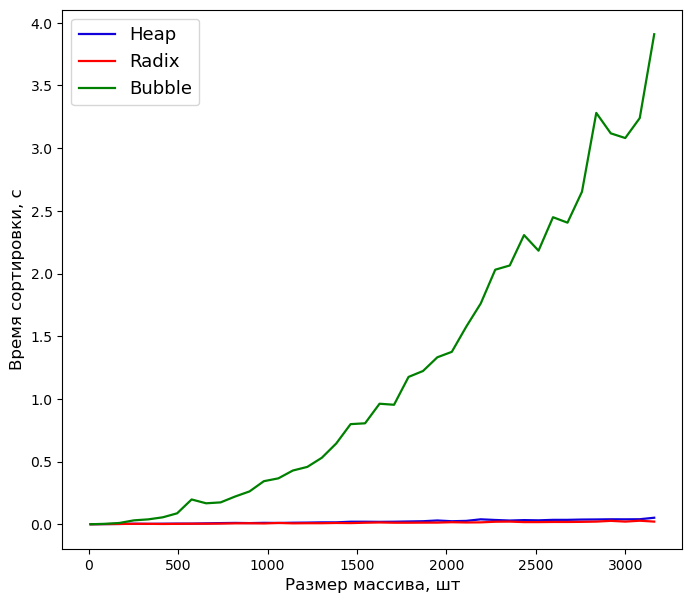

In [87]:
plt.figure(figsize=(8,7))

plt.plot(sizes_heap, times_heap, color='#1100DA', lw=1.6, label='Heap')
plt.plot(sizes_radix, times_radix, color='r', lw=1.6, label='Radix')
plt.plot(sizes_bubble, times_bubble, color='g', lw=1.6, label='Bubble')

plt.xlabel(r"Размер массива, шт", fontsize=12)

plt.ylabel(r"Время сортировки, c", fontsize=12)

plt.legend(fontsize=13, loc='upper left')


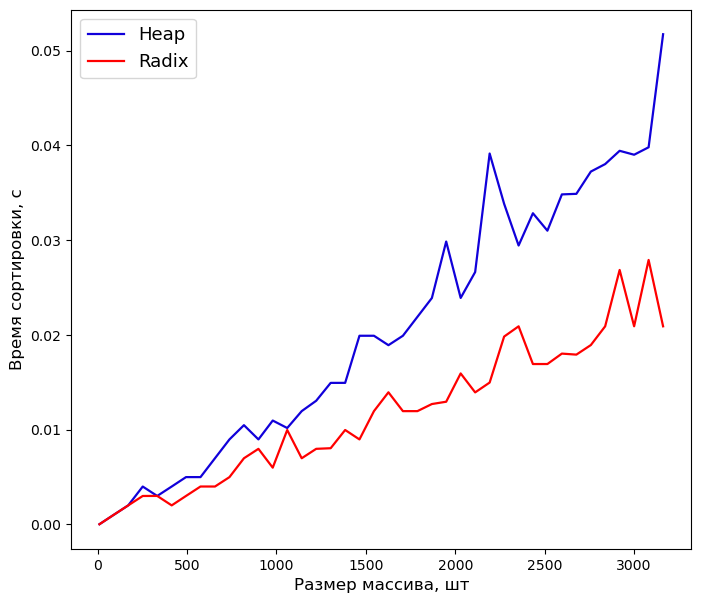

In [86]:
plt.figure(figsize=(8,7))

plt.plot(sizes_heap, times_heap, color='#1100DA', lw=1.6, label='Heap')
plt.plot(sizes_radix, times_radix, color='r', lw=1.6, label='Radix')

plt.xlabel(r"Размер массива, шт", fontsize=12)

plt.ylabel(r"Время сортировки, c", fontsize=12)

plt.legend(fontsize=13, loc='upper left')